# STAT FOR BUSINESS

## Statistical Test

### Sample Size for Estimating Single Mean

**1. Based on Standard Error**
$$
n=\left (\frac{\sigma}{\text{SE}(\bar{y})}  \right )^2
$$
  - $n$ is sample size estimate
  - $\sigma$ is standard deviation of population
  - $\text{SE}(\bar{y})$ is desired standard error

In [1]:
def sample_size_single_mean_se(sigma, standard_error):
    
    # Calculate sample size
    n = (sigma/standard_error)**2
    
    return n

**2. Based on Desired Power and Confidence Level**
- Sample size for estimating single mean based on power, confidence level and effectsize
$$
n = \frac{\sigma^2 (z_{1-{\frac{\alpha}{2}}}+z_{1-\beta})^2}{\delta^2}
$$
  - $n$ is sample size estimate
  - $\sigma$ is standard deviation of population
  - $\delta$ is desired difference to the true population
  - $z_{1-\frac{\alpha}{2}}$ represents z-value under desired significance level ($\alpha$)
  - $z_{1-\beta}$ represents z-value under the desired power 

In [2]:
def sample_size_single_mean(alpha, beta, effect_size, sigma):
    
    # Calculate z-value
    z_alpha = norm.ppf(1 - alpha/2)
    z_beta = norm.ppf(1 - beta)
    
    # Calculate sample size
    n = ( (sigma**2) * (z_alpha + z_beta)**2 ) / effect_size**2
    
    return n

### Sample Size for Estimating Difference between Two Means

**1. Based on Standard Error**

$$
n=\left (\frac{2\sigma}{\text{SE}(\bar{y}_1-\bar{y}_2)}  \right )^2
$$
  - $n$ is sample size estimate
  - $\sigma$ is standard deviation of population
  - $\text{se}(\bar{y}_1-\bar{y}_2)$ is desired standard error of difference of two means


In [3]:
def sample_size_diff_mean_se(sigma, standard_error):
    
    # Calculate sample size
    n = ( (2 * sigma) / standard_error )**2
    
    return n

**2. Based on Desired Power and Confidence Level**
$$
n = \frac{(2\sigma(z_{1-{\frac{\alpha}{2}}}+z_{1-\beta}))^2}{\delta^2}
$$
  - $n$ is sample size estimate in two groups 
  - $\sigma$ is standard deviation of population
  - $\delta$ is desired difference of two mean to be detected
  - $z_{1-\frac{\alpha}{2}}$ represents z-value under desired significance level ($\alpha$)
  - $z_{1-\beta}$ represents z-value under the desired power 

In [4]:
def sample_size_diff_mean(alpha, beta, effect_size, sigma):
    
    # Calculate z-value
    z_alpha = norm.ppf(1 - alpha/2)
    z_beta = norm.ppf(1 - beta)
    
    # Calculate sample size
    n =  (2 * sigma * (z_alpha+z_beta))**2 / (effect_size**2)
    
    return n

## Dataset EDA

In [5]:
import warnings
warnings.simplefilter("ignore")
from scipy.stats import norm

# load data
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

import warnings
warnings.filterwarnings("ignore")

In [6]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [7]:
house_pd = pd.read_excel("Real estate valuation data set.xlsx")

In [8]:
house_pd

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


In [25]:
house_pd.max()

No                                         414.000000
X1 transaction date                       2013.583333
X2 house age                                43.800000
X3 distance to the nearest MRT station    6488.021000
X4 number of convenience stores             10.000000
X5 latitude                                 25.014590
X6 longitude                               121.566270
Y house price of unit area                 117.500000
LogDistance                                  8.777713
LogPrice                                     4.766438
dtype: float64

In [26]:
house_pd.min()

No                                           1.000000
X1 transaction date                       2012.666667
X2 house age                                 0.000000
X3 distance to the nearest MRT station      23.382840
X4 number of convenience stores              0.000000
X5 latitude                                 24.932070
X6 longitude                               121.473530
Y house price of unit area                   7.600000
LogDistance                                  3.152002
LogPrice                                     2.028148
dtype: float64

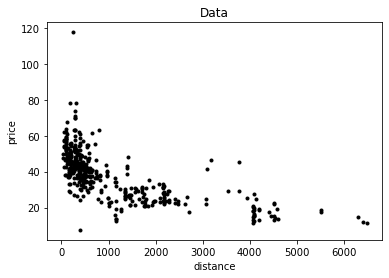

In [9]:
x = house_pd['X3 distance to the nearest MRT station']
y = house_pd['Y house price of unit area']

# Plot the data
plt.scatter(x, y, color = "k", marker=".")

# Add a legend and labels

plt.xlabel("distance")
plt.ylabel("price")

# Add a title and adjust the margins
plt.title("Data")

# Show the plot
plt.show()

- The scatterplot shows relationship betwen price and house price nearest mrt is not linear pattern
- Price describe house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)
- To estimate their relationship in percentage difference, we can build the regression to estimate the value of price by appyling log on both price and distance

In [10]:
house_pd.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

- no null value in the dataset

In [11]:
house_pd.duplicated().sum()

0

- no duplicate value in dataset

## Log Transformation

Transform eacg variabel to their log scale before building the model

In [12]:
house_pd["LogDistance"] = np.log(house_pd["X3 distance to the nearest MRT station"])
house_pd["LogPrice"] = np.log(house_pd["Y house price of unit area"])

## Fit Linear Regression

In [13]:
# Create OLS model object
model = smf.ols("LogPrice ~ LogDistance", house_pd)

# Fit the model
results = model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_house = print_coef_std_err(results)

In [14]:
results.rsquared

0.5789156055548643

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


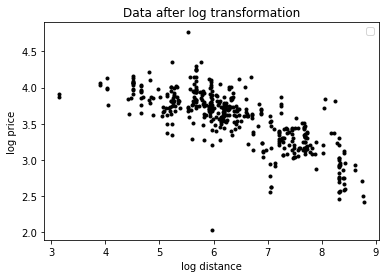

In [15]:
predictor = "LogDistance"
outcome = "LogPrice"
data = house_pd.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Add a legend and labels
plt.legend()
plt.ylabel("log price")
plt.xlabel("log distance")

# Add a title and adjust the margins
plt.title("Data after log transformation")

# Show the plot
plt.show()

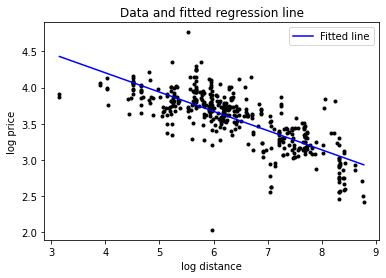

In [16]:
predictor = "LogDistance"
outcome = "LogPrice"
data = house_pd.copy()
results_ = results_house.copy()

# Plot the data
plt.scatter(data[predictor], data[outcome], color = "k", marker=".")

# Calculate the fitted values
a_hat = results_.loc["Intercept"]["coef"]
b_hat = results_.loc[predictor]["coef"]

x_domain = np.linspace(np.min(data[predictor]), np.max(data[predictor]), len(data))

fitted_values = a_hat + b_hat * x_domain

# Plot the fitted line
plt.plot(x_domain, fitted_values, label="Fitted line", color = "b")

# Add a legend and labels
plt.legend()
plt.ylabel("log price")
plt.xlabel("log distance")

# Add a title and adjust the margins
plt.title("Data and fitted regression line")

# Show the plot
plt.show()

After log transformation the data shows linear pattern in their log scales

## Coefficient Interpretation

In [17]:
results_

,coef,std err
Intercept,5.271317,0.072712
LogDistance,-0.266693,0.011206


$$\text {LogPrice} = 5.27 - 0.26 \times\text {LogDistance}$$

The interpretation of coefficient of mrt distance:
It means 1 positive difference in distance, correspond to 26 difference in 10,000 New Taiwan Dollar/Ping house price, 1 ping = 3.3 squared meter

- average ideal distance of house in nearest public transportation is 300 - 500

In [18]:
# people walking distance for 30 minutes data form prediction to DataFrame
distance1 = 500
distance2 = distance1*1.15
weight_list = np.array([distance1, distance2])
prediction_result = pd.DataFrame(data = {"distance": weight_list})

# calculate the log transform of each car's weight
prediction_result["LogDistance"] = np.log(prediction_result["distance"])

# prediction results
prediction_result["price_pred"] = results.predict(prediction_result["LogDistance"])
prediction_result

,distance,LogDistance,price_pred
0,500.0,6.214608,3.613927
1,575.0,6.354370,3.576654


In [19]:
diff_distance = prediction_result["price_pred"][1] - prediction_result["price_pred"][0]
diff_distance

-0.037273475101204046

- hasil prediksi regresi bahwa rumah dengan beda jarak 100 meter lebih jauh dari rata2 jarak ideal stasiun mrt memiliki harga lebih murah 112.72 Taiwan doollar / meter persegi

## Statistical Evaluation

In [20]:
# Given
standar_error = 0.1
sigma = np.sqrt(results.mse_resid) # standard deviation of population (estimated from residual standard deviation of regression)

In [21]:
# then calculate the number of total sample size
n =  sample_size_single_mean_se(sigma, standar_error)

print(f"Number of total sample size needed    : {n:.2f}")

Number of total sample size needed    : 6.50


In [22]:
# Given
effect_size = 0.1                    # absolute desired effect_size
conf = 0.95                        # confidence level
power = 0.8                        # power
sigma = np.sqrt(results.mse_resid) # standard deviation of population (estimated from residual standard deviation of regression)

In [23]:
# calculate beta
beta = 1 - power

# calculate alpha
alpha = 1 - conf

In [24]:
# then calculate the number of sample size
n =  sample_size_single_mean(alpha, beta, effect_size, sigma)

print(f"Number of sample size needed            : {n:.2f}")

Number of sample size needed            : 51.03
